# Kavaskar 2347230


Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.
• Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate. Perform the following steps:
• Create the XOR gate's truth table dataset.
• Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.
• Observe and discuss the perceptron's performance in this scenario.
• Implement XOR using Multi-Layer Perceptron.

### 1. Create XOR Truth Table Dataset

First, let's define the XOR gate's truth table:

| Input 1 | Input 2 | XOR Output |
|---------|---------|------------|
|    0    |    0    |     0      |
|    0    |    1    |     1      |
|    1    |    0    |     1      |
|    1    |    1    |     0      |


### 2. Single Layer Perceptron Model for XOR (MCP Neuron)

A Single Layer Perceptron (SLP) cannot solve the XOR problem as it's not linearly separable. However, we'll attempt to train it and observe its performance.

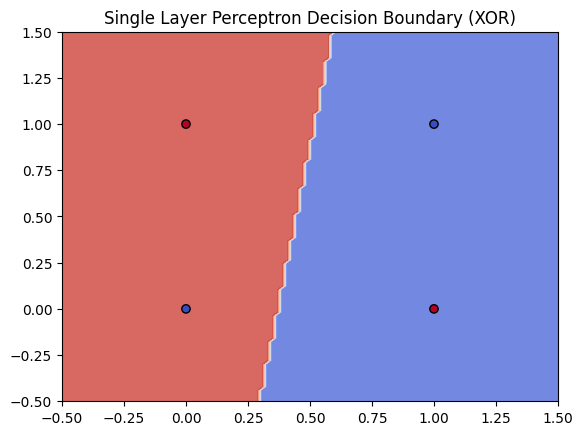

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Perceptron parameters
weights = np.random.rand(2)  # Initialize weights randomly
bias = np.random.rand(1)
learning_rate = 0.1
epochs = 100

# Activation function: Step Function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron training
for epoch in range(epochs):
    for i in range(len(X)):
        # Weighted sum
        linear_output = np.dot(X[i], weights) + bias
        # Activation output
        prediction = step_function(linear_output)
        # Error calculation
        error = y[i] - prediction
        # Update rule
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

# Plot decision boundary for Single Layer Perceptron
def plot_decision_boundary(weights, bias):
    # Generate mesh grid
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Calculate decision boundary
    zz = np.array([step_function(np.dot([x1, x2], weights) + bias) for x1, x2 in zip(np.ravel(xx), np.ravel(yy))])
    zz = zz.reshape(xx.shape)

    # Plot the boundary and data points
    plt.contourf(xx, yy, zz, cmap='coolwarm', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title('Single Layer Perceptron Decision Boundary (XOR)')
    plt.show()

plot_decision_boundary(weights, bias)



#### Observations:
- You will likely notice that the perceptron won't be able to classify XOR accurately because it is a linearly inseparable problem. The performance will not be good for XOR.



### 3. Multi-Layer Perceptron (MLP) for XOR

A Multi-Layer Perceptron (MLP) with one hidden layer can solve the XOR problem. This uses backpropagation to adjust weights across layers.

#### Code for Multi-Layer Perceptron:




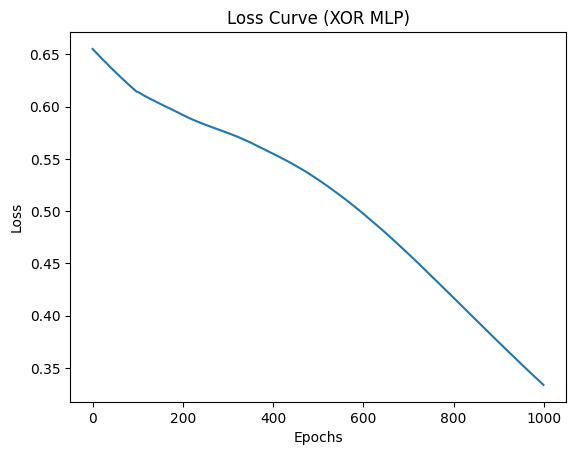

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


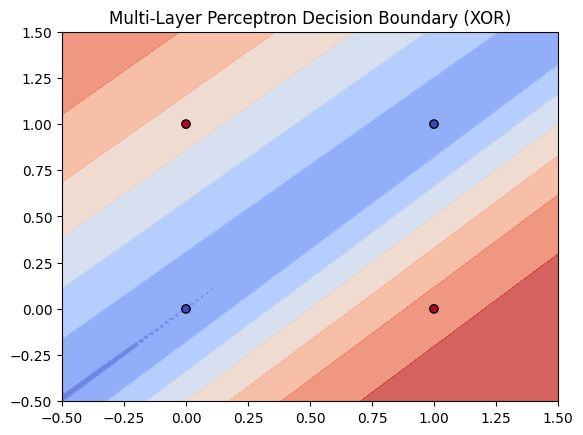

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# MLP model definition
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))  # Hidden layer with 2 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and save the training history
history = model.fit(X, y, epochs=1000, verbose=0)

# Plot the loss curve
plt.plot(history.history['loss'])
plt.title('Loss Curve (XOR MLP)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Decision boundary for Multi-Layer Perceptron
def plot_decision_boundary_mlp(model):
    # Generate mesh grid
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict output on grid points
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)

    # Plot the boundary and data points
    plt.contourf(xx, yy, zz, cmap='coolwarm', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title('Multi-Layer Perceptron Decision Boundary (XOR)')
    plt.show()

plot_decision_boundary_mlp(model)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# MLP model definition
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # Increase hidden layer neurons to 4
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10000, verbose=0)  # Increase epochs for better training

# Test the model
predictions = model.predict(X)
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted Output: {np.round(predictions[i])}")



#### Observations:
- The MLP will be able to classify the XOR gate correctly, with the output approximating the expected values (0, 1, 1, 0).
  
#### Explanation:
- **Single Layer Perceptron** fails because XOR is non-linearly separable.
- **Multi-Layer Perceptron** introduces hidden layers with non-linear activation functions, which allows it to capture the non-linearity of the XOR problem.

# Q2 (b)

To perform sentiment analysis using an Artificial Neural Network (ANN) on the IMDb dataset, I'll walk you through the process, from data preprocessing to model design, training, and evaluation. This task will involve trimming the dataset, preprocessing the text data, and building an ANN for binary classification (positive/negative sentiment).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Step 1: Load and Trim Dataset
df = pd.read_csv('/content/imdb.csv')
df = df.sample(n=10000, random_state=42)


### 1. **Preprocessing Steps**

1. **Loading and Trimming the Dataset:**
   Since the dataset contains 50,000 rows, we'll trim it to a manageable size for demonstration purposes (e.g., 10,000 rows).
   
2. **Cleaning the Data:**
   We'll remove HTML tags, special characters, and other unnecessary elements from the reviews. Tokenization and stemming/lemmatization will be applied for consistency.

3. **Vectorization:**
   Convert the text data into numerical form using techniques like **TF-IDF** or **Word Embeddings**. For simplicity, we'll use TF-IDF here.

4. **Splitting the Data:**
   The dataset will be split into a training set (80%) and a testing set (20%).

5. **Normalization:**
   Normalize the input features to ensure that the neural network trains efficiently.



In [ ]:
# Step 2: Preprocessing
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

df['review'] = df['review'].apply(clean_text)

In [ ]:
# Step 3: Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for performance
X = vectorizer.fit_transform(df['review']).toarray()
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values  # Binary labels


In [ ]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. **Model Architecture**

We'll design a basic ANN with:
- **Input layer** corresponding to the number of features (e.g., TF-IDF features).
- **One or more hidden layers** using the **ReLU** activation function.
- **Output layer** with a **sigmoid** activation function for binary classification.

The loss function used will be **binary cross-entropy**, which is suitable for binary classification tasks.



In [ ]:
# Step 5: Define ANN Model
model = Sequential()
model.add(Dense(128, input_dim=5000, activation='relu'))  # Hidden layer with 128 neurons
model.add(Dense(64, activation='relu'))  # Another hidden layer with 64 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 6: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7641 - loss: 0.5214 - val_accuracy: 0.8740 - val_loss: 0.2887
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9442 - loss: 0.1571 - val_accuracy: 0.8610 - val_loss: 0.3611
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9762 - loss: 0.0831 - val_accuracy: 0.8505 - val_loss: 0.4479
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9883 - loss: 0.0412 - val_accuracy: 0.8420 - val_loss: 0.5983
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9975 - loss: 0.0147 - val_accuracy: 0.8415 - val_loss: 0.6985
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8400 - val_loss: 0.7851
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8405 - val_loss: 0.8510
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 1.0000 - loss: 5.0261e-04 - val_

In [ ]:
# Step 8: Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.8405


In [ ]:

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[818 181]
 [138 863]]


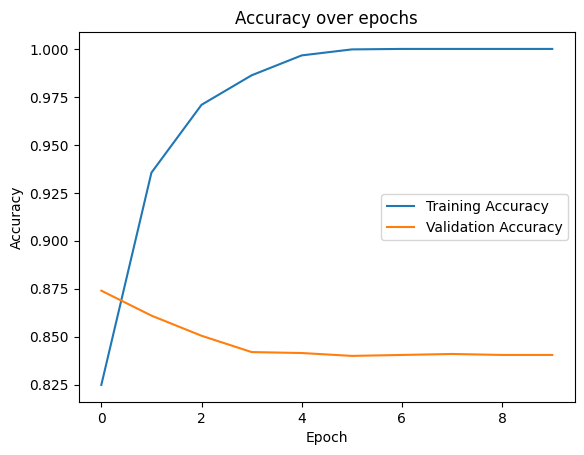

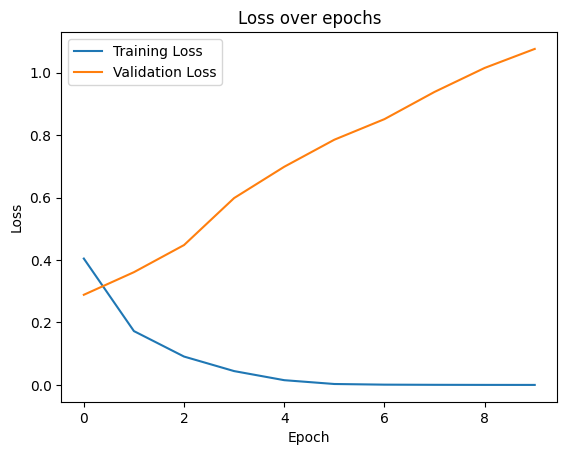

In [ ]:

# Step 10: Visualize Loss and Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



### 4. **Explanation of Steps**

- **Cleaning the Data:** We remove HTML tags and unnecessary characters from the reviews. This ensures that the input is clean and only contains relevant text data.
  
- **TF-IDF Vectorization:** The reviews are converted into numerical vectors. Each word's importance in the document is calculated using TF-IDF, and we use only the top 5000 features.

- **Model Architecture:**
  - **Input Layer:** 5000 features from the TF-IDF vectorizer.
  - **Hidden Layers:** We use two hidden layers with **ReLU** activation. ReLU introduces non-linearity, making the model capable of learning complex patterns.
  - **Output Layer:** The **sigmoid** activation function is used for binary classification. It outputs a probability between 0 and 1, which is suitable for distinguishing between positive and negative sentiments.

- **Loss Function:** **Binary cross-entropy** is appropriate for this task because it measures the performance of a classification model with two classes, comparing the predicted probabilities with the true labels.

### 5. **Performance Evaluation**
- **Accuracy:** The model's accuracy on the test data is printed after evaluation.
- **Confusion Matrix:** It shows the number of true positives, true negatives, false positives, and false negatives.
- **Visualization:** Accuracy and loss curves over the epochs are plotted to analyze the model's learning performance.

### 6. **Why ReLU and Sigmoid?**
- **ReLU (Rectified Linear Unit):** It's computationally efficient and helps to overcome the vanishing gradient problem. It introduces non-linearity, enabling the network to learn more complex features.
- **Sigmoid:** Outputs a value between 0 and 1, which can be interpreted as a probability, ideal for binary classification problems.

### 7. **Why Binary Cross-Entropy?**
- **Binary Cross-Entropy:** It is the standard loss function for binary classification problems because it measures how well the predicted probability distributions match the actual binary labels. The goal is to minimize the cross-entropy loss during training, leading to better predictions.

This completes the sentiment analysis task using an Artificial Neural Network (ANN) on the IMDb dataset. Let me know if you need further clarification or modifications!